<a href="https://www.kaggle.com/code/jatinchhabra21/song-recommendation?scriptVersionId=92091697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing necessary modules and libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# **Data cleaning and preprocessing to get desired dataset**

In [2]:
data = pd.read_csv("../input/spotify-dataset/data/data.csv")
data_genre = pd.read_csv("../input/spotify-dataset/data/data_w_genres.csv")

In [3]:
data["release_year"] = [x.split('-')[0] for x in data["release_date"]]

In [4]:
data = data[data["release_year"] >= '2000']

In [5]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,release_year
15606,0.285,2000,0.00239,['Coldplay'],0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,2000-07-10,0.0281,173.372,2000
15607,0.613,2000,0.14300,['OutKast'],0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,2000-10-31,0.2690,94.948,2000
15608,0.400,2000,0.00958,['Linkin Park'],0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,2000-10-24,0.0584,105.143,2000
15609,0.543,2000,0.00664,['3 Doors Down'],0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,2000,0.0286,99.009,2000
15610,0.760,2000,0.03020,['Eminem'],0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,2000-05-23,0.0572,104.504,2000


In [6]:
print(re.sub(r" ","_",'Imagin Dragons'))
print(re.sub("[\'\"\[\]]","","['Coldplay','Imagine Dragons']").split(","))

Imagin_Dragons
['Coldplay', 'Imagine Dragons']


In [7]:
def string_to_list(text):
    '''
    converts string that appears to be list to an actual list after removing ',",[,] symbols and splitting it by ,
    
    Parameter:
        text (string )- string that need to be converted into list
    
    Returns: 
        l (List) - returns list of the string
    
    '''
    text = re.sub(r" ","_",text)
    l = re.sub("[\'\"\[\]]","",text).split(",")
    return l

In [8]:
data["artists"] = data["artists"].apply(string_to_list)

In [9]:
add = lambda row: str(row["artists"][0]) + " - " + str(row["name"])

In [10]:
data["artists_song"] = data.apply(add,axis=1)

In [11]:
data = data.drop_duplicates("artists_song")

In [12]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,release_year,artists_song
15606,0.285,2000,0.00239,[Coldplay],0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,...,0.2340,-7.227,1,Yellow,84,2000-07-10,0.0281,173.372,2000,Coldplay - Yellow
15607,0.613,2000,0.14300,[OutKast],0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,...,0.0771,-5.946,0,Ms. Jackson,80,2000-10-31,0.2690,94.948,2000,OutKast - Ms. Jackson
15608,0.400,2000,0.00958,[Linkin_Park],0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,...,0.2090,-5.870,0,In the End,84,2000-10-24,0.0584,105.143,2000,Linkin_Park - In the End
15609,0.543,2000,0.00664,[3_Doors_Down],0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,...,0.1680,-5.708,0,Kryptonite,78,2000,0.0286,99.009,2000,3_Doors_Down - Kryptonite
15610,0.760,2000,0.03020,[Eminem],0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,...,0.0454,-4.244,0,The Real Slim Shady,80,2000-05-23,0.0572,104.504,2000,Eminem - The Real Slim Shady


# **Visualize distribution of number of songs over the years 2000 - 2020**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_year', ylabel='count'>

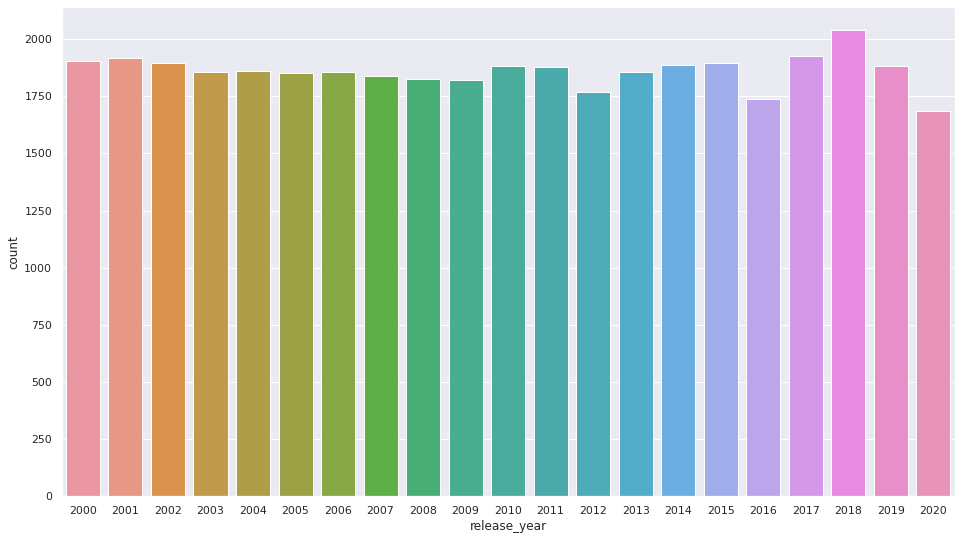

In [13]:
sns.set(rc={'figure.figsize':(16 ,9)})
sns.countplot("release_year",data=data)

# **Visualize the relation between features**

<AxesSubplot:>

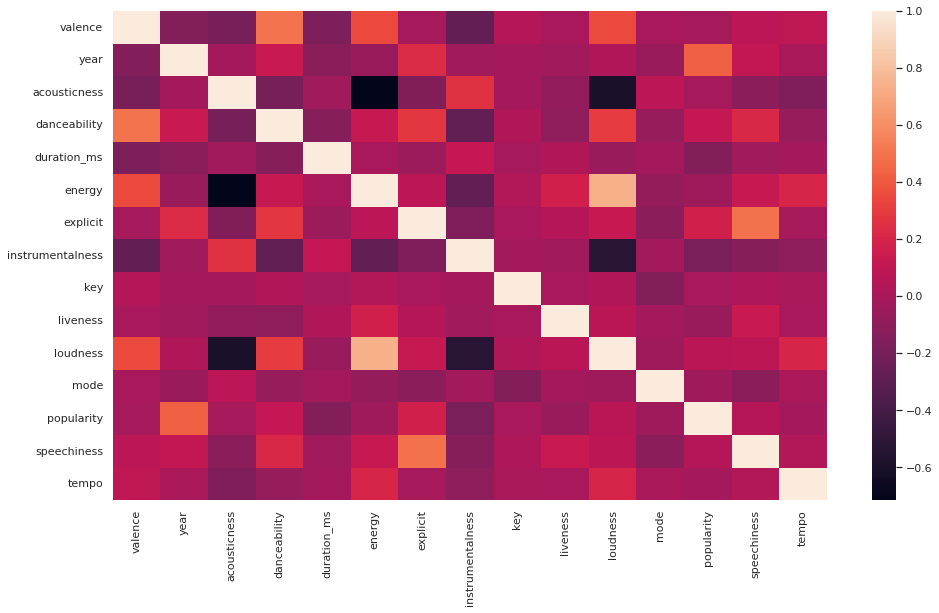

In [14]:
sns.set(rc={'figure.figsize':(16 ,9)})
sns.heatmap(data.corr())

In [15]:
data["popularity"] = data["popularity"].apply(lambda x: x//5)
data.drop(["key","explicit","mode","year","release_date"],axis=1,inplace=True)

In [16]:
float_cols = []
for i in data.columns:
    if(data[i].dtype == float):
        float_cols.append(i)
float_cols.append("duration_ms")

In [17]:
data = data.explode("artists",ignore_index=True)

In [18]:
cols = [x for x in data_genre.columns]

In [19]:
cols = cols[2:]

In [20]:
data_genre.drop(labels=cols,axis=1,inplace=True)

In [21]:
data_genre.head()

,genres,artists
0,['show tunes'],"""Cats"" 1981 Original London Cast"
1,[],"""Cats"" 1983 Broadway Cast"
2,[],"""Fiddler On The Roof” Motion Picture Chorus"
3,[],"""Fiddler On The Roof” Motion Picture Orchestra"
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""..."


In [22]:
def string_to_list_v2(text):
    
    '''
    removes symbols like ',",[,],_ from a string
    
    Parameter:
        text (string)- string that need to be converted into list
    
    Returns: 
        text (string) - returns string without symbols
    
    '''
    
    text = re.sub(r" ","_",text)
    text = re.sub("[\'\"\[\]]","",text)
    return text

data_genre["artists"] = data_genre["artists"].apply(string_to_list_v2)

In [23]:
data = data.merge(data_genre,on='artists',how='left')

In [24]:
import math
def remove_nan(l):
    
    '''
    checks if there is a float('nan') value instead of a list if true then replaces nan with empty list []
    
    Parameter:
        l (List/float('nan'))- list to check
    
    Returns: 
        l (List) - returns the list
    
    '''
    
    if type(l) == float:
        if math.isnan(l):
            return []
    else: 
        return l
data["genres"] = data["genres"].apply(remove_nan)

In [25]:
data.head()

,valence,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,release_year,artists_song,genres
0,0.285,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,16,0.0281,173.372,2000,Coldplay - Yellow,"['permanent wave', 'pop']"
1,0.613,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,16,0.2690,94.948,2000,OutKast - Ms. Jackson,"['atl hip hop', 'dirty south rap', 'hip hop', ..."
2,0.400,0.00958,Linkin_Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,16,0.0584,105.143,2000,Linkin_Park - In the End,"['alternative metal', 'nu metal', 'post-grunge..."
3,0.543,0.00664,3_Doors_Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,15,0.0286,99.009,2000,3_Doors_Down - Kryptonite,"['alternative metal', 'nu metal', 'pop rock', ..."
4,0.760,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,16,0.0572,104.504,2000,Eminem - The Real Slim Shady,"['detroit hip hop', 'hip hop', 'rap']"


In [26]:
from sklearn.preprocessing import MinMaxScaler

def scale(df):
    
    '''
    
    scales the data of dtype float from the df
    
    Parameters:
        df (pandas.DataFrame) : DataFrame to which scaling needs to be applied
    
    Returns:
        df (pandas.DataFrame) : Scaled DataFrame
    
    '''
    
    scaler = MinMaxScaler()
    df[float_cols] = scaler.fit_transform(df[float_cols])
    return df

In [27]:
data = scale(data)

In [28]:
data.head()

,valence,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,release_year,artists_song,genres
0,0.285,0.002400,Coldplay,0.435091,0.044010,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,0.858335,Yellow,16,0.029579,0.787700,2000,Coldplay - Yellow,"['permanent wave', 'pop']"
1,0.613,0.143574,OutKast,0.854970,0.044704,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,0.879170,Ms. Jackson,16,0.283158,0.431388,2000,OutKast - Ms. Jackson,"['atl hip hop', 'dirty south rap', 'hip hop', ..."
2,0.400,0.009618,Linkin_Park,0.563895,0.034724,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,0.880406,In the End,16,0.061474,0.477708,2000,Linkin_Park - In the End,"['alternative metal', 'nu metal', 'post-grunge..."
3,0.543,0.006667,3_Doors_Down,0.552738,0.037898,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,0.883041,Kryptonite,15,0.030105,0.449838,2000,3_Doors_Down - Kryptonite,"['alternative metal', 'nu metal', 'pop rock', ..."
4,0.760,0.030321,Eminem,0.962475,0.047253,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,0.906852,The Real Slim Shady,16,0.060211,0.474805,2000,Eminem - The Real Slim Shady,"['detroit hip hop', 'hip hop', 'rap']"


In [29]:
def string_to_list_v3(text):
    
    '''
    removes symbols like ',",[,], from a string
    
    Parameter:
        text (string)- string that need to be converted into list
    
    Returns: 
        l (List) - returns list 
    
    '''
    
    l = re.sub("[\'\"\[\]]","",text).split(',')
    return l

def strip_space(l):
    
    '''
    strips extra whitespaces from elements of the list
    
    Parameter:
        l (List)- List whose elements need to be stripped of extra whitespaces
    
    Returns: 
        l (List) - returns List after stripping whitespaces
    
    '''
    
    for i in range(len(l)):
        l[i] = l[i].strip()
    return l

data["genres"] = data["genres"].apply(lambda x:string_to_list_v3(str(x)))
data["genres"] = data["genres"].apply(strip_space)
(data.iloc[:5,-1])

0                                [permanent wave, pop]
1    [atl hip hop, dirty south rap, hip hop, rap, s...
2    [alternative metal, nu metal, post-grunge, rap...
3    [alternative metal, nu metal, pop rock, post-g...
4                      [detroit hip hop, hip hop, rap]
Name: genres, dtype: object

In [30]:
def ohe_prep(df,column,new_name):
    
    '''
    creates one hot encoded features
    
    Parameter:
        df (pandas.DataFrame) - DataFrame whose column needs to be One Hot Encoded
        column (string) - name of the column that needs to be One Hot Encoded
        new_name (string) - new name of the One Hot Encoded columns
    
    Returns: 
        tf_df (pandas.DataFrame) - returns DataFrame of encoded features only
    
    '''
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + " | " + str(i) for i in feature_names]
    tf_df.reset_index(drop=True, inplace=True)
    return tf_df

In [31]:
def create_feature_set(df):
    
    '''
    creates the entire feature set including Tfidf vectorized genres, ohe year and popularity and all the columns of the df with float values
    
    Parameter:
        df (pandas.DataFrame)- DataFrame from which all the features must be extracted
    
    Returns: 
        final (pandas.DataFrame) - returns DataFrame with all features that are needed to calculate similarity score
    
    '''
    
    tfidf = TfidfVectorizer()
    dmt = tfidf.fit_transform(df['genres'].apply(lambda x:" ".join(x)))
    genre_df = pd.DataFrame(dmt.toarray())
    genre_df.columns = ["genre" + " | " + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop=True,inplace=True)
    
    year_df = ohe_prep(df,"release_year","year")
    pop_df = ohe_prep(df,"popularity","pop")
    
    final = pd.concat([df[float_cols],pop_df,year_df,genre_df],axis=1)
    
    final["id"] = df["id"]
    
    return final

In [32]:
complete_feature_set = create_feature_set(data)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
complete_feature_set.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms,...,genre | yo,genre | york,genre | youth,genre | zhongguo,genre | zolo,genre | zouglou,genre | zouk,genre | zuliana,genre | zydeco,id
0,0.285,0.002400,0.435091,0.661,0.000121,0.2340,0.858335,0.029579,0.787700,0.044010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3AJwUDP919kvQ9QcozQPxg
1,0.613,0.143574,0.854970,0.806,0.000000,0.0771,0.879170,0.283158,0.431388,0.044704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0I3q5fE6wg7LIfHGngUTnV
2,0.400,0.009618,0.563895,0.864,0.000000,0.2090,0.880406,0.061474,0.477708,0.034724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60a0Rd6pjrkxjPbaKzXjfq
3,0.543,0.006667,0.552738,0.865,0.000011,0.1680,0.883041,0.030105,0.449838,0.037898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6ZOBP3NvffbU4SZcrnt1k6
4,0.760,0.030321,0.962475,0.661,0.000000,0.0454,0.906852,0.060211,0.474805,0.047253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3yfqSUWxFvZELEM4PmlwIR


# **Installing and Importing spotipy library to get playlist**

In [34]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [35]:
file = open("../input/credentials-pvt/credentials.txt",'r')
lines = file.readlines()
credentials = []
for line in lines:
    credentials.append(line.strip())
client_id = credentials[0]
client_secret = credentials[1]

In [36]:
client_credentials_manager = SpotifyClientCredentials(client_id = client_id,client_secret = client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# **Generating Recommendations using the playlist id, spotify api for developers and spotipy library that enables us to use spotify api in python**

In [37]:
def recommend(playlist_id,complete_feature_set,n=20):
    
    '''
    
    generates recommendation from a spotify playlist
    
    Parameters:
        playlist_id (string) - Playlist Id of the spotify playlist
        complete_feature_set (pandas.DataFrame) - DataFrame with all feature needed to calculate similarity score
        n (int) - number of recommendations generated (by default it is 20) and max is 50
    
    Returns:
        url (List) - List of Image url of the posters of recommended songs
        name (List) - List of names of the recommended songs
    
    '''
    if(n>50):
        n = 50
    
    playlist_feature_set = []
    tracks = []
    for track in sp.playlist_tracks(playlist_id,limit = 100)["items"]:
        feature = []
        track_id = track["track"]["uri"]
        tracks.append(track_id.split(":")[-1])
        artist_id = track["track"]["artists"][0]["uri"]
        artist_info = sp.artist(artist_id)
        feature.append(artist_info["name"])
        feature.append(artist_info["popularity"]//5)
        for i in float_cols:
            audio_feature = sp.audio_features(track_id)[0]
            feature.append(audio_feature[i])
        feature.append(int(track["track"]["album"]["release_date"].split("-")[0]))
        feature.append(track_id.split(":")[-1])
        feature.append(artist_info["genres"])
        if(int(track["track"]["album"]["release_date"].split("-")[0]) < 2021 and int(track["track"]["album"]["release_date"].split("-")[0]) > 1999):
            playlist_feature_set.append(feature)
    playlist_feature_set = pd.DataFrame(playlist_feature_set,columns=['artists','popularity']+float_cols+['release_year','id','genres'])
    playlist_feature_set = scale(playlist_feature_set)
    playlist_df = create_feature_set(playlist_feature_set)
    df = pd.DataFrame(columns = complete_feature_set.columns)
    for i in range(len(df.columns)):
        if df.columns[i] in playlist_df.columns:
            df[df.columns[i]] = playlist_df[df.columns[i]]
        else:
            df[df.columns[i]] = [0.0]*playlist_df.shape[0]
    playlist_vector = df.iloc[:,:-1].mean(axis=0)
    score = []
    for i in range(complete_feature_set.shape[0]):
        score.append(cosine_similarity(playlist_vector.to_numpy().reshape(1,-1),complete_feature_set.iloc[i,:-1].to_numpy().reshape(1,-1))[0][0])
    complete_feature_set["score"] = score
    recommended = []
    complete_feature_set.sort_values("score",ascending=False,inplace=True)
    recommended = complete_feature_set.iloc[:100,-2]
    recommended.drop_duplicates(inplace=True)
    url = []
    name = []
    for i in recommended[:n]:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
    return name,url

In [38]:
name,url = recommend("37i9dQZF1EVKuMoAJjoTIw",complete_feature_set)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Printing posters and name of the recommended songs**

In [39]:
from skimage import io
def visualize_songs(name,url):
    '''
    
    Visualize posters of the songs

    Parameters: 
        name (List) - List of names of the recommended songs
        url (List) - List of the Image url of the posters of the recommended songs
        
    Returns:
        None
        
    '''
    plt.figure(figsize=(15,int(0.625 * len(url))))
    columns = 5
    for i, u in enumerate(url):
        plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 12)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
    plt.show()

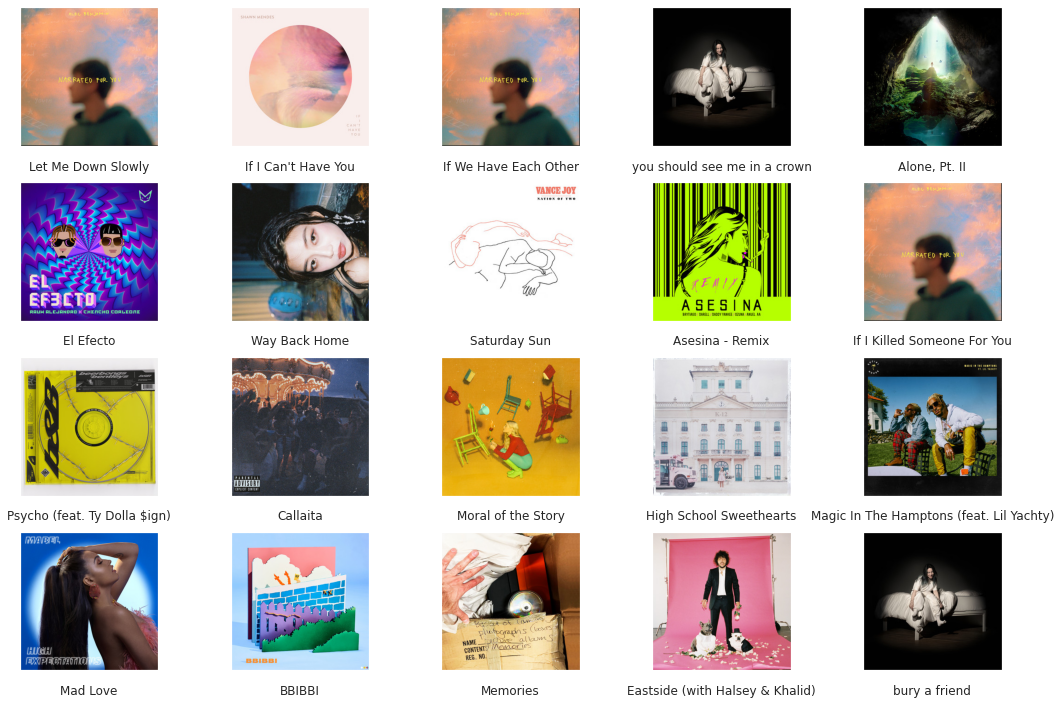

In [40]:
visualize_songs(name,url)